In [1]:
import pandas as pd

In [11]:
info_model = pd.read_csv("best/Kawa_double2best.csv", header=None, sep=",")
type(info_model)

pandas.core.frame.DataFrame

In [3]:
info_model

,0
0,3072
1,0
2,2
3,20
4,4
5,0.1
6,8.482317e-05
7,0.0002364727419576877
8,None
9,0


In [4]:
info_model.loc[3, 0]

'20'

In [5]:
info_model.to_list()

AttributeError: 'DataFrame' object has no attribute 'to_list'

In [6]:
sensitivity_df = pd.DataFrame(columns=["batch_size",
                                           "regularization_parameter",
                                           "kernel_regularizer",
                                           "neurons",
                                           "hidden_layers",
                                           "residual_parameter",
                                           "L2_norm_test",
                                           "error_train",
                                           "error_val",
                                           "error_test"])

In [7]:
sensitivity_df

,batch_size,regularization_parameter,kernel_regularizer,neurons,hidden_layers,residual_parameter,L2_norm_test,error_train,error_val,error_test


In [18]:
best_case = "kdv_single"
"best/" + best_case + "best.csv"

'best/kdv_singlebest.csv'

In [12]:
import csv

with open("best/Kawa_double2best.csv", newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

print(data)



[['24576'], ['0'], ['2'], ['32'], ['4'], ['10.0'], ['0.09412431'], ['0.0006652028503141579'], ['None'], ['0'], ['1.0'], ['100000.0'], ['tanh'], ['LBFGS'], ['8192'], ['16384'], ['0'], ['0.0'], ['42821.16122341156'], ['0.5611746999999999'], ['0.0002264325662512675'], ['0.0001977935899049044'], ['7.57294225692749'], ['0.0006652028503141579'], ['100000'], ['2'], ['0.0006652028503141579'], ['0.0006652028503141579'], ['0.00042422615615617186'], ['0.5611746999999999'], ['11']]


In [13]:
int(data[3][0]), int(data[4][0]), float(data[5][0])

(32, 4, 10.0)

In [14]:
N_coll = int(data[15][0])
N_u = int(data[14][0])
N_int = int(data[16][0])

In [15]:
retrain = int(data[25][0])
retrain

2

In [21]:
network_properties = {
    "hidden_layers": [int(data[4][0])],  # [4, 8, 12]
    "neurons": [int(data[3][0])],  # [20, 24, 28, 32]
    "residual_parameter": [float(data[5][0])],  # [0.1, 1, 10]
    "kernel_regularizer": [2],
    "regularization_parameter": [0],
    "batch_size": [(N_coll + N_u + N_int)],
    "epochs": [1],
    "max_iter": [100],
    "activation": ["tanh"],
    "optimizer": ["LBFGS"]
}

In [23]:
network_properties["max_iter"][0]

100

# test seeds

In [27]:
import random

random.seed(42)

seeds = list()
seeds.append(42)
n_retrain = 7
for i in range(n_retrain - 1):
    seeds.append(random.randint(1, 100))
print(seeds)

[42, 82, 15, 4, 95, 36, 32]


# plotting & OS operation

In [2]:
directory_in_str = "Kawa_single_cp/iter_100"

In [3]:
import os

directory = os.fsencode(directory_in_str)
    
for file in os.listdir(directory):
    print(file)
    filename = os.fsdecode(file)
    print(filename)
    print(directory)
    print(type(file))
    print(type(filename))
    if filename.endswith(".txt") or filename.endswith(".py"): 
        print(os.path.join(directory, file))
#         continue
#     else:
#         continue


b'InfoModel.txt'
InfoModel.txt
b'Kawa_single_cp/iter_100'
<class 'bytes'>
<class 'str'>
b'Kawa_single_cp/iter_100/InfoModel.txt'
b'TrainedModel'
TrainedModel
b'Kawa_single_cp/iter_100'
<class 'bytes'>
<class 'str'>
b'Images'
Images
b'Kawa_single_cp/iter_100'
<class 'bytes'>
<class 'str'>


In [11]:
import pandas as pd

# base_path_list = ["kdv_single_cp", "kdv_double_cp", "Kawa_single_cp",
#                   "CH_single_lim1_cp", "CH_double_lim1_cp", "BO_single_enh4_1_cp", "BO_double_enh30_cp"]
# base_path_list = ["Kawa_double2_cp", "Kawa_gen_cp", "Kawa_agen_cp"]
base_path_list = ["kdv_single_cp"]

for base_path in base_path_list:
    print("#################################################")
    print(base_path)

    directories_iter = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]
    print(directories_iter)
    
    info_model_total = None
    for dir_iter in directories_iter:
#         assert os.path.isfile(base_path + "/" + dir_iter + "/InfoModel.txt") == True
        if os.path.isfile(base_path + "/" + dir_iter + "/InfoModel.txt") == True:
            info_model = pd.read_csv(base_path + "/" + dir_iter + "/InfoModel.txt", header=0, sep=",", float_precision='round_trip')
            info_model_total = pd.concat([info_model_total, info_model], 0)
#         print(info_model)
    print(info_model_total)
    info_model_total.shape
        
        
        
        

#################################################
kdv_single_cp
['iter_5000', 'iter_1000', 'iter_500', 'iter_10000', 'iter_100', 'iter_2000']
   Nu_train  Nf_train  Nint_train  validation_size  train_time  L2_norm_test  \
0      1024      2048           0              0.0   58.011475      0.000085   
0      1024      2048           0              0.0   43.898566      0.001233   
0      1024      2048           0              0.0   21.431156      0.004133   
0      1024      2048           0              0.0   60.680519      0.000085   
0      1024      2048           0              0.0    3.864212      0.460715   
0      1024      2048           0              0.0   60.594549      0.000085   

   rel_L2_norm  error_train  error_vars  error_res  error_reg  error_wreg  \
0     0.000034     0.000236    0.000078   0.000706   6.855038    0.000236   
0     0.000492     0.000734    0.000185   0.002246   6.853168    0.000734   
0     0.001648     0.002406    0.000892   0.007066   6.850567    0

In [12]:
info_model_total.shape, type(info_model_total)

((6, 15), pandas.core.frame.DataFrame)

In [15]:
df = info_model_total[['iterations', 'train_time', 'error_train', 'rel_L2_norm']].sort_values('iterations')
df = df.sort_values('iterations') # 'train_time'

with pd.option_context('display.precision', 10):
    print(df)

   iterations     train_time   error_train   rel_L2_norm
0         100   3.8642120361  0.0674589979  0.1837436400
0         500  21.4311563969  0.0024059036  0.0016481353
0        1000  43.8985664845  0.0007338550  0.0004915693
0        2000  60.5945491791  0.0002364727  0.0000338294
0        5000  58.0114748478  0.0002364727  0.0000338294
0       10000  60.6805188656  0.0002364727  0.0000338294


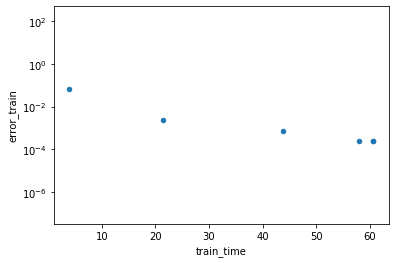

In [80]:
df.plot.scatter(x='train_time',y='error_train', logy=True)

In [87]:
iterations = df['iterations'].values
train_time = df['train_time'].values
error_train = df['error_train'].values
rel_L2_norm = df['rel_L2_norm'].values

## one y axis plot

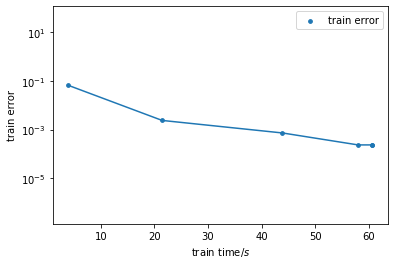

In [88]:
import matplotlib.pyplot as plt

# plt.xscale('log')
plt.yscale('log')
plt.scatter(x=train_time, y=error_train, label='train error', marker="o", s=14)
plt.plot(train_time, error_train)
plt.xlabel('train time' + r'$/s$')
plt.ylabel('train error' )

plt.legend()

In [89]:
error_train

array([0.067459  , 0.0024059 , 0.00073386, 0.00023647, 0.00023647,
       0.00023647])

## two y axis plot

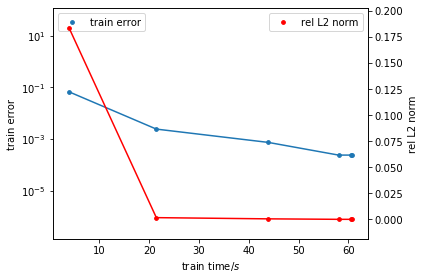

<Figure size 432x288 with 0 Axes>

In [91]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)
# fig, ax1 = plt.subplots()

ax1.set_xlabel('train time' + r'$/s$')
ax1.set_ylabel('train error')
ax1.set_yscale('log')
ax1.scatter(x=train_time, y=error_train, label='train error', marker="o", s=14)
ax1.plot(train_time, error_train)
ax1.legend(loc=2)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('rel L2 norm')
# ax2.set_yscale('log')
ax2.scatter(x=train_time, y=rel_L2_norm, label='rel L2 norm', marker="o", s=14, color='r')
ax2.plot(train_time, rel_L2_norm, color='r')
ax2.legend(loc=1)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# fig.legend(loc="upper right")
plt.show()

plt.savefig('cp_fig/Kawa_single_cp.jpg', dpi=500)
# plt.savefig(images_path + "/Samples.png", dpi=500)

## example from internet

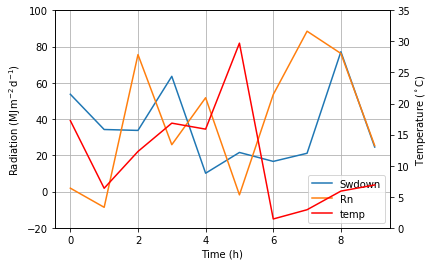

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('mathtext', default='regular')

time = np.arange(10)
temp = np.random.random(10)*30
Swdown = np.random.random(10)*100-10
Rn = np.random.random(10)*100-10

fig = plt.figure()
ax = fig.add_subplot(111)

lns1 = ax.plot(time, Swdown, '-', label = 'Swdown')
lns2 = ax.plot(time, Rn, '-', label = 'Rn')
ax2 = ax.twinx()
lns3 = ax2.plot(time, temp, '-r', label = 'temp')

# added these three lines
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

ax.grid()
ax.set_xlabel("Time (h)")
ax.set_ylabel(r"Radiation ($MJ\,m^{-2}\,d^{-1}$)")
ax2.set_ylabel(r"Temperature ($^\circ$C)")
ax2.set_ylim(0, 35)
ax.set_ylim(-20,100)
plt.show()


## profiles plot

In [1]:
import torch
from ImportFile import *
import itertools

In [2]:
import os
cwd = os.getcwd()
cwd

'/Users/baigm/courses/biye/code/BaiPinns'

In [157]:
def plotting(models, iters, images_path, extrema, name):
    '''
    Function to make plots
    Args:
        model: neural network approximating the solution
        images_path: path where to save plots
        extrema:  extrema of the domain
        solid:
    '''
    
    for model in models:
        model.cpu()
        model = model.eval()
    n = 500
    x = torch.reshape(torch.linspace(extrema[1, 0], extrema[1, 1], n), [n, 1])
#     time_steps = [-1.0, 1.0]
    time_steps = [1.0]
    scale_vec = np.linspace(0.65, 1.55, len(time_steps))
    scale_vec_pred = np.linspace(0.65, 1.55, len(models) * len(time_steps))

    fig = plt.figure()
    plt.grid(True, which="both", ls=":")
    for val, scale in zip(time_steps, scale_vec):
        plot_var = torch.cat([torch.tensor(()).new_full(size=(n, 1), fill_value=val), x], 1)
        plt.plot(x, Ec.exact(plot_var), 'b-', linewidth=2, label=r'Exact, $t=$' + str(val) + r'$s$', color=lighten_color('grey', scale), zorder=0)
        

    for [val, model_ext], scale in zip(list(itertools.product(time_steps, zip(models, iters))) , scale_vec_pred):
        plot_var = torch.cat([torch.tensor(()).new_full(size=(n, 1), fill_value=val), x], 1)
#         plt.plot(x, Ec.exact(plot_var), 'b-', linewidth=2, label=r'Exact, $t=$' + str(val) + r'$s$', color=lighten_color('grey', scale), zorder=0)
        plt.scatter(plot_var[:, 1].detach().numpy(), model_ext[0](plot_var).detach().numpy(), label=r'Pred, $t=$' + str(val) + r'$s$, $iters=$' + model_ext[1], marker="o", s=5,
                    color=lighten_color('C0', scale), zorder=10)

    plt.xlabel(r'$x$')
    plt.ylabel(r'u')
    plt.legend()
    plt.savefig(images_path + "/" + name + ".png", dpi=500)

/Users/baigm/courses/biye/code/BaiPinns/BO_double_enh30_cp/iter_1000/TrainedModel/model.pkl
/Users/baigm/courses/biye/code/BaiPinns/BO_double_enh30_cp/iter_2000/TrainedModel/model.pkl
/Users/baigm/courses/biye/code/BaiPinns/BO_double_enh30_cp/iter_5000/TrainedModel/model.pkl


list

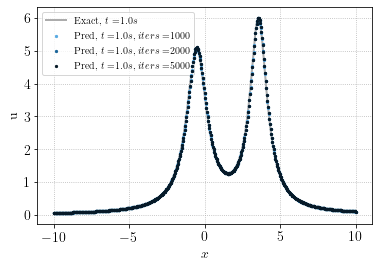

In [159]:
folder = 'BO_double_enh30_cp'
import EquationModels.DispersiveEquation.BO as Ec
iters = ['1000', '2000', '5000']
images_path = cwd + "/TestBai"
models = []
for itera in iters:
    path = cwd + '/' + folder + '/iter_' + itera + '/TrainedModel/model.pkl'
    print(path)
    model = torch.load(path)
    models.append(model)

plotting(models, iters, images_path, Ec.extrema_values, "Samples_profiles")
type(models)

In [95]:
model = torch.load(path)
model

Pinns(
  (input_layer): Linear(in_features=2, out_features=32, bias=True)
  (batch_input): BatchNorm1d(32, eps=1e-05, momentum=0.05, affine=True, track_running_stats=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=32, bias=True)
  )
  (batch_layers): ModuleList(
    (0): BatchNorm1d(32, eps=1e-05, momentum=0.05, affine=True, track_running_stats=True)
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.05, affine=True, track_running_stats=True)
    (2): BatchNorm1d(32, eps=1e-05, momentum=0.05, affine=True, track_running_stats=True)
  )
  (output_layer): Linear(in_features=32, out_features=1, bias=True)
  (activation): Tanh()
)

IndexError: index 1 is out of bounds for dimension 1 with size 1

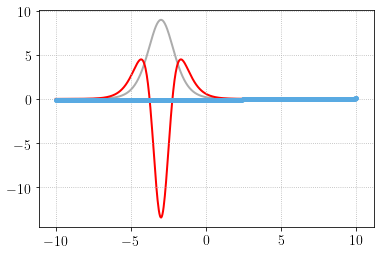

In [96]:
images_path = cwd + "/TestBai"
Ec.plotting(model, images_path, Ec.extrema_values, None)

### zip & pair test

In [25]:
import itertools

In [26]:
for i,j,k in zip([1,2], [3,4,5], [6,7,8,9]):
    print([i, j, k])

[1, 3, 6]
[2, 4, 7]


In [28]:
list(itertools.product([1,2],[3,4,5]))

[(1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5)]

In [52]:
pairs = [("a", 1), ("b", 2), ("c", 3)]

In [66]:
pairs[0][1]

1

In [55]:
z = zip([1,2], [3,4,5], [6,7,8,9])
z[0]

TypeError: 'zip' object is not subscriptable